<a href="https://colab.research.google.com/github/weathon/kNN_Research/blob/main/Simple_2D_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import autograd.numpy as np
from autograd import grad

In [2]:
def f(x):
  return (x-50)**2

In [57]:
# generate data
import random
X = []
Y = []
label = []
for i in range(400):
  x = np.random.uniform()*100
  y = np.random.uniform()*100
  X.append([x,y])
  if y>f(x):
    Y.append(1)
  else:
    Y.append(0)

In [59]:
X = np.array(X)
Y = np.array(Y)
indexs = np.arange(len(X))

def train_step(A, k):
  global X,Y, accuracy

  r = int(len(X)*0.9)
  #kunoukoukeduziheisright?kunduzikun zhe gee shi qu 0.8 meiciyifong 0.1?xkou hmiande 0.2 kunkouke zheyag gaicheng 0.9 zhihou yiranconverge 
  npX = np.array(X[:r])
  npY = np.array(Y[:r])
  X_val = np.array(X[r:])
  Y_val = np.array(Y[r:])

  error = 0
  # TruePositives = 0
  # FalseNegatives = 0
  # FalsePositives = 0
  # TrueNegatives = 0
  MSE = 0.0

  for sample in range(len(X)-r): 
    distance = np.sum(A*(npX - X_val[sample])**2,axis=1) 
    sum0 = 0
    sum1 = 0
    mins = np.argsort(distance)[:k]
    sum0 += np.sum(1/(distance[mins]+1))
    sum1 += np.sum(1/(distance[mins]+1) * (npY[mins]))

    MSE += (sum1/sum0-Y_val[sample])**2

  return  MSE/(len(X)-r)

In [24]:
def d(A):
  return train_step(abs(A),30)
train_grad = grad(d)

In [25]:
def X_shuffle(X):
  return np.append(X[len(X)//10:,:],X[:len(X)//10,:],axis=0)

def shuffle(X):
  return np.append(X[len(X)//10:],X[:len(X)//10])

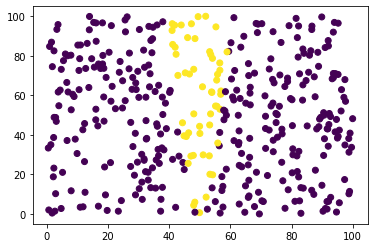

In [60]:
plt.scatter(X[:,0],X[:,1],c=Y) #xkouruankun nanshou chaojisuan xkoutttttkun ruanhuxi yanyang ttxkouhuxizhangkun huang tanxaoixoaikmaikandaoskou xkoukunyachiruantt zhege tumeicuo suoruanruanurunttkunsuoyizhendeshishukjucuolejiumaijianchaxkouxkouruanku

In [ ]:
# ruanzhendexkou buxipaitupianshidui de xueyaxueyatttttxueyakun numpybushuruan

In [53]:
# np.random.shuffle(indexs) xianshuffle yebuxin jiushuom? shouzhizhang shuoming gaoluan le a meiyou shulle Y? dengdeng you a xiaminjiuyou kuzizang peng yi zixko
A = np.array([1.0,1.0])
losses = []
for epoches in range(30): 
  losssum = 0
  for batch in range(10):
    slope = train_grad(A)
    A-=slope*0.01
    loss = train_step(A,30) 
    losssum+=loss
    indexs = shuffle(indexs) 
    X = X[indexs]
    Y = Y[indexs] 
  losses.append(losssum)
  print(losssum)
 

1.461169597521715
1.3636281860488924
1.3753576948353459
1.4132727432013248


KeyboardInterrupt: ignored

In [33]:
np.random.shuffle(indexs) #aaaaakunkunkunkouke gaomingbao le zhegeshibufanhui de womendeshifanhuide fadoufaruankun koke suoyiwomendeqishimeigenggaiyoushizhegewentiquanhsnegruan

#ttttxueyakunttdanshikaishishuffleyiciyousmwentis

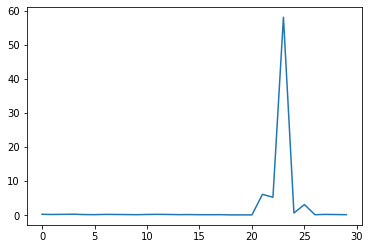

In [37]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [28]:
A

array([1.69310372, 0.03545942])